<a href="https://colab.research.google.com/github/jcv00036/amn_p/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Import all the libraries I can use
import math
import matplotlib.pyplot as plt
import numpy as np

##Introduction:

**[ f(x) = 0  <=>  x is a root of f(x) ]**


---
Ex:

>  x+arctan(2x+1)=3, goes strictly increasing from -∞ to +∞ so it has exactly 1 solution.
>
>  It is not possible to compute the exact value but we can approximate.
---

# Unit 9: Root Finding Algorithms

## 1. Plotting functions:

###How it's coded:

In order to plot functions in python, it is necessary to `import` the packages `matplotlib.pyplot` and `numpy`

It is strongly advised to import ``matplotlib.pyplot` and `numpy` like so:


```
import matplotlib.pyplot as plt
import numpy as np
```



How it works is: we divide the function in several evenly spaced points and evaluate it at those points. Now we only need to join them and we have a graph.

>The closer the points are, the closer the graph will be to the actual fuction

Ex:

---
> x+arctan(2x+1)=3 can be plotted like this:


```
fig, ax = plt.subplots() #this defines a tuple because the function returns the figure(container where you draw things), and the axis
ax.plot(x,y)

plt.show()
```


---


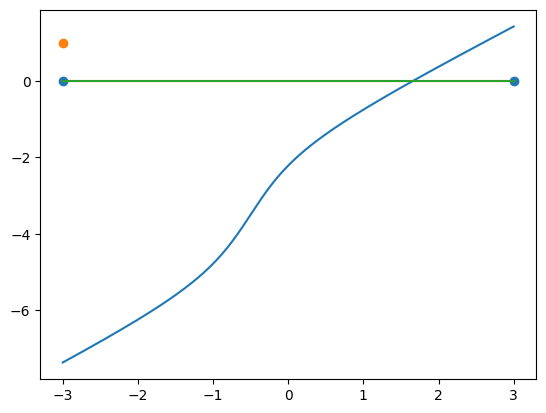

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np

#Define the function: f(x) = x+arctan(2x+1)-3
def f(x):
  return x + np.arctan(2*x+1)-3

#Now, everytime we grite f(x) given x some value, we will have a result to the ecuation.

a = -3
b = 3

subdivisions = 1000000

x = np.linspace(a,b,subdivisions) #subdivide x into "subdivisions" evenly spaced point from a to b
#⬆Is the set of the points in x, meaning the domain

y = f(x)
#⬆Is the set of the points in y, meaning the codomain or image


#now we define another function that returns 0
y2 = [0 for n in range(subdivisions)]



#********************************
fig, ax = plt.subplots() #this defines a tuple because the function returns the figure(container where you draw things), and the axis
ax.plot(x,y)
ax.plot(x,y2) #second function
ax.plot([-3,3],[0,0]) #this outputs the same graph than the function with image y2, but how it works is: given two points, it draws them and joins them
ax.scatter([-3,3],[0,0]) #this outputs the same but without joining the points
ax.scatter([-3],[1]) #this is a way of printing a point

plt.show()
#******************************** This code plots the function

## 2. Find a solution to an equation:

###Bisection method:

With two points, one positive and another negative (a and b):
1. My approximation will be in (a+b)/2, meaning in the middle point between a and b

How it's programmed:


>Naïve method:

```
#I define my function
#My points will be a and b, e.g. 1 and 2
#I check if the sign changes in that interval
  #If it does: reduce the interval from the right
  #If it doesn't: reduce the interval from the left

#Naive way
def f(x):
  return x + np.arctan(2*x+1)-3

error = 0.0001
a = 1
b = 2

while((b-a) > error):
  c=(a+b)/2
  if(f(c)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
    b=c
  else:
    a=c

print((a+b)/2) #The solution is between a and b, so I print the middlepoint
```

>More clever method:

```
# I do the same as before but I use a function:

#More clever way, approached as a function
def f(x):
  return x + np.arctan(2*x+1)-3

def bisection(f,a,b,error):
  while((b-a) > error):
    c=(a+b)/2
    if(f(c)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
      b=c
    else:
      a=c
  return (a+b)/2

print(bisection(f,1,2,0.0001))

```

>Better approach, the recursive one:

```
# I do the same as before but I use a recursive function:

#Better way, using recursive functions:
def f(x):
  return x + np.arctan(2*x+1)-3

def bisection(f,a,b,error):
  if(b-a<2*error):
    return (a+b)/2
  if(f((a+b)/2)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
    return bisection(f,a,(a+b)/2,error)
  else:
    return bisection(f,(a+b)/2,b,error)
  return (a+b)/2

print(bisection(f,1,2,0.0001))

```

In [6]:
#Naive way
def f(x):
  return x + np.arctan(2*x+1)-3

error = 0.0001
a = 1
b = 2

while((b-a) > error):
  c=(a+b)/2
  if(f(c)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
    b=c
  else:
    a=c

print((a+b)/2) #The solution is between a and b, so I print the middlepoint


1.657012939453125


In [7]:
#More clever way, approached as a function
def f(x):
  return x + np.arctan(2*x+1)-3

def bisection(f,a,b,error):
  while((b-a) > error):
    c=(a+b)/2
    if(f(c)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
      b=c
    else:
      a=c
  return (a+b)/2

print(bisection(f,1,2,0.0001))

1.657012939453125


In [8]:
#Better way, using recursive functions:
def f(x):
  return x + np.arctan(2*x+1)-3

def bisection(f,a,b,error):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    error: float
        maximum tolerable error

  Returns
  -------
    solution: float
        approximate solution to the equation
  """
  if(b-a<2*error):
    return (a+b)/2
  if(f((a+b)/2)*f(a)<0): #minus times minus returns minus, so if the result of the product is negative, it means that the solution is between c and a
    return bisection(f,a,(a+b)/2,error)
  else:
    return bisection(f,(a+b)/2,b,error)
  return (a+b)/2

print(bisection(f,1,2,0.0001))

1.65704345703125


###Regula falsi:

With two points, one positive and another negative (a and b):
1. I join the two points and form a line.
2. My approximation will be wherever this line is 0

>It is coded like so:

```
#the same as the bisection method but the approximation point c is calculated
#like so:
#the points are: (a,f(a)) and (b,f(b)), so the equation of the line is:
#y=f(a)+((f(b)-f(a))/(b-a))(x-a)
#c = some x such that y=0

def f(x):
  return x + np.arctan(2*x+1)-3

def regulaFalsi(f,a,b,tolerance):
  c = ((a*f(b)-b*f(a))/(f(b)-f(a)))
  if(b-c<tolerance or c-a < tolerance):
    return (a+b)/2
  if(f(c)*f(a)<0):
    return regulaFalsi(f,a,c,tolerance)
  else:
    return regulaFalsi(f,c,b,tolerance)

print(regulaFalsi(f,1,2,0.0001))
```

⬆I just changed the point c which before was (a+b)/2 (the mean point)

Here we're not calculating with an error but a tolerance, meaning it is not the difference between the real point and the approximation, it is just an approximation wich might be close.

In [9]:
def f(x):
  return x + np.arctan(2*x+1)-3

def regulaFalsi(f,a,b,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    a: float
        left limit of the interval
    b: float
        rigth limit of the interval
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    solution: float
        approximate solution to the equation
  """
  c = (a*f(b)-b*f(a))/(f(b)-f(a))
  if b-c<tolerance or c-a<tolerance:
    return c
  if f(a)*f(c)>0:
    return regulaFalsi(f,c,b,tolerance)
  else:
    return regulaFalsi(f,a,c,tolerance)

print(regulaFalsi(f,1,2,0.00001))

1.6569856870444324


###Newton-Raphson's graph

With two points, one positive and another negative (a and b):
1. I draw the tangent line at a
2. My approximation will be wherever this tangent line has a value of 0

>How it's coded:


```
#The equation for the tangent line can be expressed like so:
#x=a-((f(a))/(f'(a)))

def f(x):
  return x + np.arctan(2*x+1)-3

def derivative(f,x):
  h = 0.001
  return (f(x+h)-f(x))/h

x = 1
tolerance =0.0001

while True:
  xnew = x - f(x)/derivative(f,x) #here I calculate the new point with the formula above
  if(x - xnew < tolerance):
    x = xnew
    break
  x = xnew

print(x)

```



In [10]:
def f(x):
  return x + np.arctan(2*x+1)-3

def derivative(f,x):
  h = 0.001
  return (f(x+h)-f(x))/h

x = 1
tolerance =0.0001

def newtonRalphson(f,x,tolerance):
  """
  Parameters
  ----------
    f: function
        the function that represents our equation
    x: float
        initial guess
    tolerance: float
        minimum difference between consecutive approximations

  Returns
  -------
    x: float
        approximate solution to the equation
  """
  while True:
    xnew = x - f(x)/derivative(f,x)
    if(math.fabs(x - xnew) < tolerance):
      x = xnew
      break
    x = xnew
  return x

print(newtonRalphson(f,x,tolerance))

1.6569856705111714


###Iterative method

**This works whenever |g'(x0)| < 1 and we start close enough to x0**

>How it works:
We define a line y=x and we want to find the point where g(x) (my equation isolating y*) is equal to x.
From a point x0, we compare both functions in an espiral way until g(x) = x, which will be the solution.

>\* For example, if my equatoin  is x+arctan(2x+1)=3, then my g(x)= 3-arctan(2x+1)

>How it's coded:


```
def f(x):
  return x + np.arctan(2*x+1)-3 #my function

def g(x):
  return 3-np.arctan(2*x+1) #the function I create

while(True):
  xnew = g(x)
  if(abs(x-xnew)<0.0001): #If the difference between the point I estimate and the point I want is less than the error, I've made the aproximation I wanted
    print(xnew)
    break
  else:
    x = xnew; #Else, iterate again and find a point closer

while(abs(x-xnew)>0.0001): #better way
  x = xnew
  xnew = g(x)
  
print(xnew)
```

>In coclusion, this method does and spiral around the point until it reaches x or a point in it's vecinity that's good enough



In [11]:
def f(x):
  return x + np.arctan(2*x+1)-3 #my function

def g(x):
  return 3-np.arctan(2*x+1)

while(True):
  xnew = g(x)
  if(abs(x-xnew)<0.0001):
    print(xnew)
    break
  else:
    x = xnew;

while(abs(x-xnew)>0.0001): #better way
  x = xnew
  xnew = g(x)

print(xnew)

1.6569846696760524
1.6569846696760524


###Trisection method

* How it works:
1. There's a function with a maximum and we want to see where it is. To do so, we don't want to derivate as that would mean doing things by hand and adding errors we cannot handle.
2. So we restrict the function to a domain where there's only one maximum: [a,b]. Now, f(x) is unimodal on [a,b] when it has only one max/min and increases /decreases before/after it.
3. Now we divide the interval in three different subintervals: [a,c1],[c1,c2] and [c2,b].
>c1=(2a+b)/3    &    c2=(a+2b)/3
4. We compare c1 and c2. Whichever is greater, describes us the curve, meaning we can discard one subinterval from the study.
> For example, if there's a function where c1>c2, the maximum won't be in the interval [c2,b].


*   How it's coded:


```
def trisection(f,a,b,error):
  if(b-a)<2*error:
    return(a+b)/2 #Return the midpoint

  c1=(2*a+b)/3
  c2=(a+2*b)/3

  if f(c1) > f(c2):
    return trisection(f,a,c2,error)
  else:
    return trisection(f,c1,b,error)
```






In [12]:
def f(x):
  return np.sin(x) # my function

def trisection(f,a,b,error):
  if(b-a)<2*error:
    return(a+b)/2 #Return the midpoint

  c1=(2*a+b)/3
  c2=(a+2*b)/3

  if f(c1) > f(c2):
    return trisection(f,a,c2,error)
  else:
    return trisection(f,c1,b,error)

print("An approximate value of pi is: ", 2*trisection(f,0,2,0.00000000000001))


An approximate value of pi is:  3.14159267466321


In [13]:
def trisection(f,a,b,error,n):
  if(b-a)<2*error:
    return(a+b)/2 , n #Return the midpoint and n

  c1=(2*a+b)/3
  c2=(a+2*b)/3

  if f(c1) > f(c2):
    return trisection(f,a,c2,error,n+1)
  else:
    return trisection(f,c1,b,error,n+1)

result, n = trisection(f,0,2,0.00000001,1)
print("An approximate value of pi is: ", 2*result , " and we needed ", n , " iterations.")


An approximate value of pi is:  3.1415926644782743  and we needed  47  iterations.


###Gradient descent method

* How it works:
1.   When you're looking for a maximum or  a minimum in a point x, if can approximate from the left or the right
2.   In each side of the point, the sign of the derivate will be different and if you come close enough to x, very very small (meaning a almost horizontal tangent).
3.   If the value of the derivative is very big, I should do a leap in the function bigger than if it were very small, as we can expect to be further from the point x.
4. xn`1 = xn-λf'(xn) | Lamda being a parameter


* How it's coded:

This code works for a 1 variable function
```
a = 0.05 #for example, as a=λ
while True:
  xnew = x-a*derivative(f,x)
  print(xnew) #prints the sequence of approximations
  if(abs(x-xnew) < tolerance):
    x=xnew
    break
  x=xnew
```

This code works for a 2 variable function
```
# two parameter functions:
def f(x,y):
  return x**2+y**2 #our solution is (0,0) as we know it's the minimum

def gradient(f,x,y):
  h=0.001
  px=(f(x+h,y)-f(x,y))/h
  py=(f(x,y+h)-f(x,y))/h
  return [px,py]

x = 1
y = 1
a = 0.3
tolerance = 0.0000000000001 #tolerable error

while True:
  xnew = x-a*gradient(f,x,y)[0]
  ynew = y-a*gradient(f,x,y)[1]
  print(xnew,ynew)#prints the approximations
  #the conditoin of this ⬇ if, is the euclidean? distance, the square of x and y in a sqrt
  if((((x-xnew)**2+(y-ynew)**2)**(1/2))<tolerance): #if I reach the tolerance, I update and break
    x=xnew
    y=ynew
    break
  x=xnew #else, I update my numbers and come back again
  y=ynew
```








In [14]:
#one parameter functions:
def f(x):
  return x**2*(x-1)

def derivative(f,x):
  h=0.001
  return (f(x+h)-f(x))/h

x = 1
a = 0.05
tolerance = 0.0000000000000000000001

while True:
  xnew = x-a*derivative(f,x)
  print(xnew) #prints the sequence of approximations
  if(abs(x-xnew) < tolerance):
    x=xnew
    break
  x=xnew

0.9498999500000055
0.9094509227560039
0.876244400257929
0.8486167162761764
0.8253784957248488
0.8056550393422227
0.7887876386579166
0.7742701435429786
0.7617068290984345
0.7507836119596343
0.74124790081573
0.7328941861426234
0.7255535374167155
0.719085817779088
0.7133738246846772
0.7083188190176566
0.7038370706903836
0.6998571588871147
0.6963178397751616
0.6931663459783403
0.6903570181447334
0.687850194531233
0.6856113029376782
0.6836101127286199
0.6818201145508469
0.6802180026978293
0.6787832405880733
0.6774976940053045
0.6763453199443583
0.6753119013692057
0.6743848201012878
0.6735528615509434
0.6728060461812855
0.6721354835257731
0.6715332453236572
0.6709922549329861
0.6705061906610377
0.6700694010413255
0.66967683040352
0.669323953342415
0.6690067169059671
0.6687214894992335
0.6684650156480212
0.6682343758886802
0.6680269511532633
0.6678403911058473
0.6676725859589041
0.6675216413607432
0.6673858559978729
0.6672637016013583
0.6671538050850421
0.6670549325768655
0.6669659751333972
0

In [15]:
#two parameter functions:
def f(x,y):
  return x**2+y**2 #our solution is (0,0) as we know it's the minimum

def gradient(f,x,y):
  h=0.001
  px=(f(x+h,y)-f(x,y))/h
  py=(f(x,y+h)-f(x,y))/h
  return [px,py]

x = 1
y = 1
a = 0.3
tolerance = 0.0000000000001 #tolerable error

while True:
  xnew = x-a*gradient(f,x,y)[0]
  ynew = y-a*gradient(f,x,y)[1]
  print(xnew,ynew)#prints the approximations
  #the conditoin of this ⬇ if, is the euclidean? distance, the square of x and y in a sqrt
  if((((x-xnew)**2+(y-ynew)**2)**(1/2))<tolerance): #if I reach the tolerance, I update and break
    x=xnew
    y=ynew
    break
  x=xnew #else, I update my numbers and come back again
  y=ynew

0.39970000000002415 0.39970000000002415
0.15958000000001382 0.15958000000001382
0.06353200000000553 0.06353200000000553
0.02511280000000221 0.02511280000000221
0.009745120000000912 0.009745120000000912
0.0035980480000003577 0.0035980480000003577
0.0011392192000001422 0.0011392192000001422
0.00015568768000005697 0.00015568768000005697
-0.00023772492799997719 -0.00023772492799997719
-0.00039508997119999087 -0.00039508997119999087
-0.00045803598847999634 -0.00045803598847999634
-0.0004832143953919986 -0.0004832143953919986
-0.0004932857581567995 -0.0004932857581567995
-0.0004973143032627198 -0.0004973143032627198
-0.0004989257213050879 -0.0004989257213050879
-0.0004995702885220352 -0.0004995702885220352
-0.0004998281154088141 -0.0004998281154088141
-0.0004999312461635257 -0.0004999312461635257
-0.0004999724984654102 -0.0004999724984654102
-0.0004999889993861641 -0.0004999889993861641
-0.0004999955997544656 -0.0004999955997544656
-0.0004999982399017862 -0.0004999982399017862
-0.00049999929

# Unit 10: Interpolation and approximation

In this unit we will have two main problemas:


*   Interpolation problem: we have a mesh of points and we want a polynomial(a function) that descrivbes all those points (or their derivate). For this, we will have three ways:

>*   Lagrange interpolation
*   Newton interpolation
*   Hermite interpolation(Spline/ Bézier curves)


*   A curve that approximates said points. We will use the method:

>* Least-square method (regretion line)



##Interpolation problems

All sets of `n` points can be interpolated by a polynomial of degree `n-1`.

In essence, our points will be of the form `(x0,y0)` with an equation: `y0=ax^3+bx0^2+cx+d` (if there's 4 points).

The system of linear equations that result of joining all the equations of the points is always compatible, meaning there's a **unique solution**. But this method is slow so we will use other alternative methods:

###Lagrange's interpolation

For a mesh of points (x0,y0),(x1,y1),...,(xn,yn), we have the following polynomials:

P0(x) = ((x-x1)(x-x2)...(x-xn))/((x0-x1)(x0-x2)...(x0-xn))
By multiplying the points substracted from x and dividing by the same but susbtracted by x0. This will give th eresults:
>P0(x0) = 1  &  p0(xj)=0 (if j != 0)

This can be generalized like so:

P(x) = [yi*Pi(x) for i o = up to n]

In essence every Pi(x) is a polynomial that returns 1 if x = xi and 0 otherwise.

It can be coded like so:

In [16]:
#t is a variable
def lagrangeInterpolation(t,x,y):
  sum = 0
  n = len(x)
  for i in range(n): #this for is the summatory mentioned before
    term = y[i]
    for j in range(n):
      if j!=i:
        term *= (t-x[j])/(x[i]-x[j]) #we will call x to t so we don't call the array for the calculation
    sum += term #this is the sums that return the final result of the summatory
  return sum

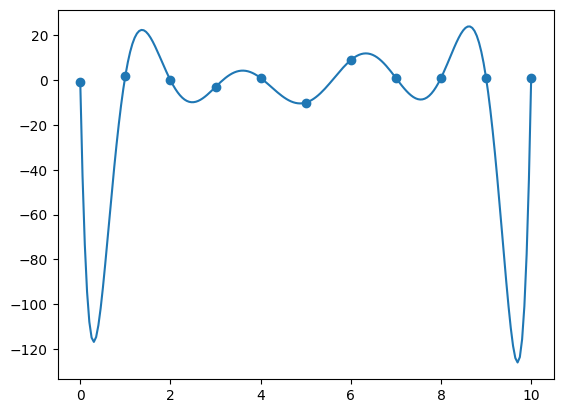

In [17]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [-1,2,0,-3,1,-10,9,1,1,1,1]

t = np.linspace(x[0],x[len(x)-1],200)

def p(t):
  return lagrangeInterpolation(t,x,y);

fig, ax = plt.subplots() #this defines a tuple because the function returns the figure(container where you draw things), and the axis
ax.scatter(x,y)
ax.plot(t,p(t)) #plot t versus pol

plt.show()

###Newton's interpolation

In this method I'll use the divided difference: instead of f(x), we will define
* f[x] = f(x)
* f[x,y] = (f(x)-(y))/(y-x)
* f[x,y,...,k] = (f[y,...,k]-f[x,y,...,k-1])/(k-x)

...given that x,y,...,k are diffent.

What we'll do is:
* Create a table with all the divided differences
 * First row will be all the single parameter divided differences
 * Second row will be all the double parametrer divided differences
 * Third row will be all the three element divided differences
 * and so on

x0         | x1         |...| xn <br>
f[x0] = y0 | f[x1] = y1 |...| f[xn-1]=yn-1 | f[xn]=yn <br>
f[x0,x1]   | f[x1,x2]   |...| f[xn-1,xn] (one less column)

The process goes like this:
p(t) = f[x0] (as independent term) + f[x0,x1]*(t -x0)+ f[x0,x1,x2]*(t -x0)(t -x1)+ ... + f[x0,x1,...,xn]*(t-x0)(t-x1)...(t-xn-1))

In [18]:
def dividedDifferences(x,y):
  '''
  Parameters
  ----------
    x:float array
        x coordinates of the points
    y:float array
        y coordinates of the points
  Returns
  -------
    L: matrix
        table of divided differences
  '''
  L=[y]
  n = len(x) #n: number of points (x,y), degree of the polynomial

  #computing the matrix that contains the table
  for i in range(1,n):
    row = []
    for j in range(n-i):
      row.append((L[i-1][j]-L[i-1][j+1])/(x[j]-x[j+i]))
    L.append(row)

  return L

In [19]:
x = [0,1,2,3]
y = [-1,2,0,-3]
print(dividedDifferences(x,y))

[[-1, 2, 0, -3], [3.0, -2.0, -3.0], [-2.5, -0.5], [0.6666666666666666]]


In [20]:
def dividedDifferencesForNewton(x,y):
  '''
  Parameters
  ----------
    x:float array
        x coordinates of the points
    y:float array
        y coordinates of the points
  Returns
  -------
    L: matrix
        first elements of each row of the table of divided differences
  '''
  L=[y]
  n = len(x) #n: number of points (x,y)

  #computing the matrix that contains the table
  for i in range(1,n):
    row = []
    for j in range(n-i):
      row.append((L[i-1][j]-L[i-1][j+1])/(x[j]-x[j+i]))
    L.append(row)

  return [row[0] for row in L]

#Newton's interpolation is quicker than Lagrange's Interpolation, although the result is the same
#Another benefict of this approach is that we can add new elements, the only new computation we have to do is add a new diagonal to the divided differences
def newtonInterpolation(t,x,y):
  '''
  Parameters
  ----------
    t: float
        variable
    x:float array
        x coordinates of the points
    y:float array
        y coordinates of the points
  Returns
  -------
    result: float
      p(t)
  '''
  dd = dividedDifferencesForNewton(x,y)
  n = len(x)

  #these two lines are the first summand of p(t)
  result = dd[0]
  product = 1 #product of factors


  for i in range(1,n): #n iterarions
    product *= t-x[i-1]
    result += dd[i]*product
  return result

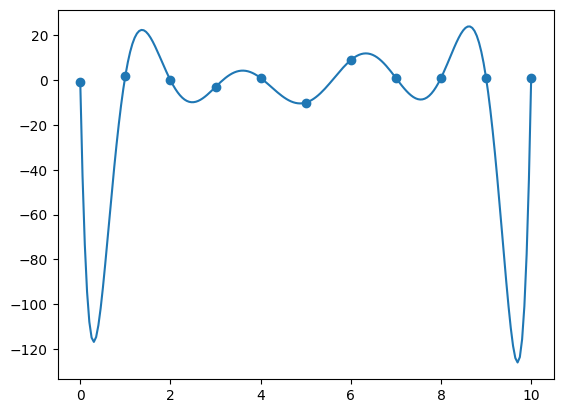

In [21]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [-1,2,0,-3,1,-10,9,1,1,1,1]

t = np.linspace(x[0],x[len(x)-1],200)

def p(t):
  return newtonInterpolation(t,x,y);

fig, ax = plt.subplots() #this defines a tuple because the function returns the figure(container where you draw things), and the axis
ax.scatter(x,y)
ax.plot(t,p(t)) #plot t versus pol

plt.show()

###Hermite's interpolation

This can calculate a polynomial for a set of points with certain values for their first and second derivatives.

* If we have a first derivative give, we just have to add another xn to the divided differences table.
*f[x0,...,xi] =(f[x0,...,xi-1]-f[x1,...,xi])/(x0-xi)
* If we have repeated terms, f[x,...(h)...,x]=f^(h-1)(x)/h!  ((h-1)-ith derivative)

In [22]:
def dividedDifferencesForHermite(list):
  '''
  Parameters
  ----------
    list: float array
        this list stores all the vectors that define the points with this format:
         [(x0,y0,y'0,y''0,...),(x1,y1,y'1,y''1,...),...]

  Returns
  -------
    L: matrix
        first elements of each row of the table of divided differences
  '''
  L = []
  points = []
  pointer = []
  row = []
  n = 0

  for i in range(len(list)):
    n = n + len(list[i]) - 1
    for j in range(1,len(list[i])):
      points.append(list[i][0])
      pointer.append(i)
      row.append(list[i][1])
  L.append(row)

  for i in range(1,n):
    row = []
    for j in range(n-i):
      if (points[j] != points[j+i]):
        row.append((L[i-1][j]-L[i-1][j+1])/(points[j]-points[j+i]))
      else:
        row.append(list[pointer[j]][i+1]/math.factorial(i))
    L.append(row)

  return [row[0] for row in L]

def hermiteInterpolation(t,list):
  '''
  Parameters
  ----------
    t: float
        variable
    list: float array
        this list stores all the vectors that define the points with this format:
         [(x0,y0,y'0,y''0,...),(x1,y1,y'1,y''1,...),...]
  Returns
  -------
    result: float
      p(t)
  '''
  dd = dividedDifferencesForHermite(list)
  points = [] #this vector contains all the points

  for i in range(len(list)):
    for j in range(1,len(list[i])):
      points.append(list[i][0])

  #these two lines are the first summand of p(t)
  result = dd[0]
  product = 1 #product of factors

  for i in range(1,len(points)): #n iterarions
    product *= t-points[i-1]
    result += dd[i]*product
  return result

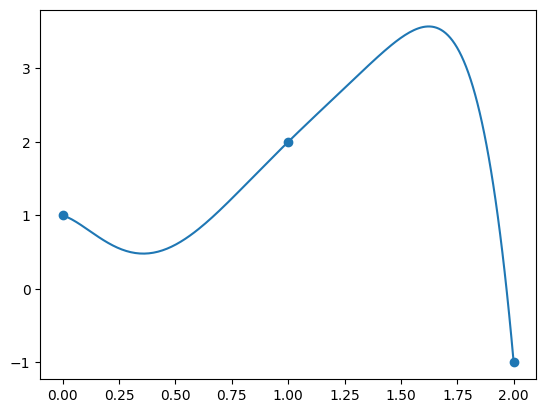

In [23]:
data = [[0,1,-1],[1,2,3,-1,2],[2,-1]]

t = np.linspace(0,2,200)

def p(t):
  return hermiteInterpolation(t,data);

fig, ax = plt.subplots()
ax.scatter([0,1,2],[1,2,-1])
ax.plot(t,p(t))

plt.show()

###Spline interpolation

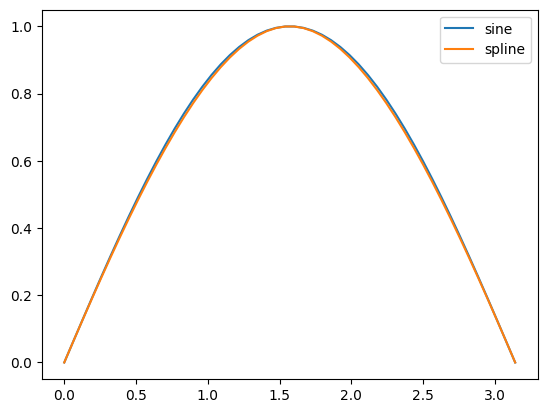

In [24]:
#This example approximates the sine function with just two points given
def f(x):
  return np.sin(x)

def spline(t):
  if 0<=t and t<=np.pi/2:
    return hermiteInterpolation(t,[[0,0,1],[np.pi/2,1,0]])
  elif t>= np.pi/2:
    return hermiteInterpolation(t,[[np.pi/2,1,0],[np.pi,0,-1]])

fig, ax = plt.subplots()

t = np.linspace(0,np.pi,50)
y = f(t)
z = [spline(s) for s in t]

ax.plot(t,y, label="sine")
ax.plot(t,z, label="spline")

ax.legend()

plt.show()

If we want some figure to be drawn easily, we can get some nodes (points) and use Hermite's interpolation to get some degree 3 polynomials that will construct some approximation to the figure with just some of the data.



##Bézier curves (spline interpolation with two variables)

We can separate the curves in two functions, one will solve the position of x points and the other the positions of y points:
* x(t)
* y(t)

Both return degree 3 polynomials

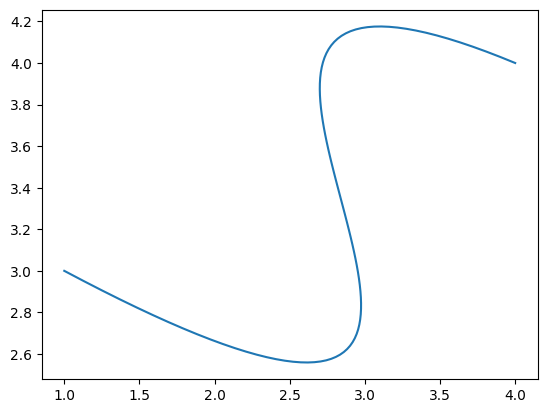

In [25]:
def firstCoordinate(t):
  return hermiteInterpolation(t,[[0,1,13],[1,4,10]])

def secondCoordinate(t):
  return hermiteInterpolation(t,[[0,3,-5],[1,4,-3]])

fig, ax = plt.subplots()

t = np.linspace(0,1,100)
x = firstCoordinate(t)
y = secondCoordinate(t)

ax.plot(x,y)

plt.show()

##Approximation problems (least-squares)

The point of leas-square approximation is to reduce the degree of the polynomial in order to create an approximate curve that describes, mostly, the shape that forms the point mesh. The main difference it has with interpolation is that it doesn't need to be exact, as it doesn't need to pass through the points.

To use least-squares, we need to define the inner product for functions, which can be approached form two ways:<br>
>a)Discrete case: <br>
  f*g = (for i in range 0 to n)Σf(xi)*g(xi) => <br>
  ||f||= √((for i in range 0 to n)Σf(xi)^2) => <br>
  d(f,g) = √((for i in range 0 to n)Σ(f(xi)-g(xi)^2)

>b)Continuous case:<br>
  f*g = (a to b)∫(f(x)*f(x))dx


###Discrete version

In [26]:
def innerProduct(f,g,x):
  '''
  Parameters
  ----------
    f : function
    g : function
    x:array
        data of the point mesh
  Returns
  -------
    sum: float
        inner product of the two functions
  '''
  sum = 0
  for i in range(len(x)):
    sum += f(x[i])*g(x[i])
  return sum

def distance(f,g,x):
  '''
  Parameters
  ----------
    f : function
    g : function
    x:array
        data of the point mesh
  Returns
  -------
    distance: float
        distance between the two functions
  '''
  sum = 0
  for i in range(len(x)):
    sum = sum + (f(x[i])-g(x[i]))**2
  return np.sqrt(sum)

In [27]:
def generatorMatrices(degree,data,f):
  '''
  Parameters
  ----------
    degree : integer
        degree of the polynomial we are trying to calculate
    data:array
        data of the point mesh
    f: function

  Returns
  -------
    a,b: arrays
        a and b matrices of generators and solutions
  '''

  a = [[innerProduct(lambda x: x**i,lambda x: x**j,data) for j in range(degree+1)] for i in range(degree+1)]
  b = [innerProduct(lambda x: x**i,f,data) for i in range(degree+1)]
  return a,b

def leastSquareApproximation(a,b,f,x):
  '''
  Parameters
  ----------
    a : array
    b : array
        both a and b are the generator matrices
    f: function
    x: float
        point of evaluation of the approximation

  Returns
  -------
    approximation: float
        approximation to the function by the least-square method
  '''
  sol = np.linalg.solve(a,b)
  return sum([sol[i]*(lambda x: x**i)(x) for i in range(0,len(sol))])


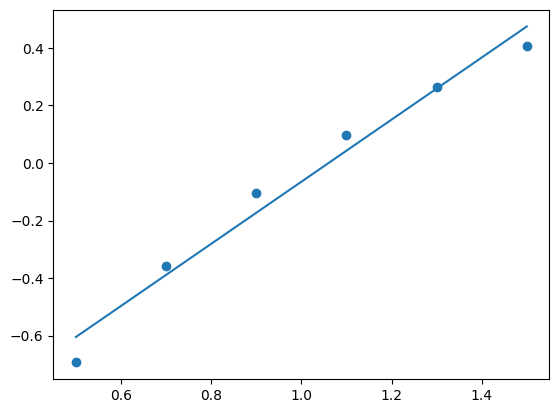

the distance in this approximation is: 0.14481304192095543


In [28]:
def f(x): #define some function, e.g. f(x)=log(x)
  return np.log(x)


#We want to approximate this mesh of points with a straigth line
x = np.linspace(0.5,1.5,6)
fig, ax = plt.subplots()
ax.scatter(x,f(x))
#***************************************************************

#***************************************************************

#***u1 and u2 will be my generators***
def u1(x):
  return 1

def u2(x):
  return x
#*************************************

data = [0.5,0.7,0.9,1.1,1.3,1.5]

#This means aλ = b
#a = np.array([[innerProduct(u1,u1,data),innerProduct(u1,u2,data)],
# [innerProduct(u2,u1,data),innerProduct(u2,u2,data)]])
#b = np.array([innerProduct(u1,f,data),innerProduct(u2,f,data)])
#print(a,b)
a,b = generatorMatrices(1,data,f)

sol = np.linalg.solve(a,b)

def approx(x):
  return sol[0]*u1(x)+sol[1]*u2(x)

#y = approx(x)
#ax.plot(data,y)
#***************************************************************

x = np.linspace(0.5,1.5,6)
ax.plot(x,leastSquareApproximation(a,b,f,x))

plt.show()

print("the distance in this approximation is: "+ str(distance(f,approx,data)))

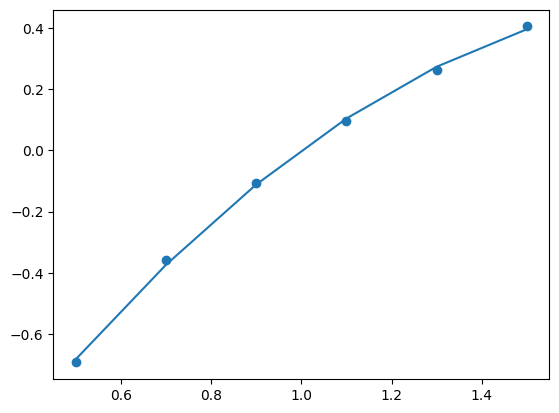

the distance in this approximation is: 0.02703563738322595


In [29]:
#Now we want to approximate the graph with a second degree curve:
x = np.linspace(0.5,1.5,6)
fig, ax = plt.subplots()
ax.scatter(x,f(x))
#***************************************************************

#***************************************************************

#***u1, u2 and u3 will be my generators***
def u1(x):
  return 1

def u2(x):
  return x

def u3(x):
  return x**2
#*************************************

data = [0.5,0.7,0.9,1.1,1.3,1.5]

#This means aλ = b, λ being a parameter
a = np.array([[innerProduct(u1,u1,data),
               innerProduct(u1,u2,data),
               innerProduct(u1,u3,data)],
 [innerProduct(u2,u1,data),
  innerProduct(u2,u2,data),
  innerProduct(u2,u3,data)],
 [innerProduct(u3,u1,data),
  innerProduct(u3,u2,data),
  innerProduct(u3,u3,data)]])
b = np.array([innerProduct(u1,f,data),innerProduct(u2,f,data),innerProduct(u3,f,data)])

sol = np.linalg.solve(a,b)

def approx(x):
  return sol[0]*u1(x)+sol[1]*u2(x)+sol[2]*u3(x)

y = approx(x)
ax.plot(data,y)
#***************************************************************

plt.show()

print("the distance in this approximation is: "+ str(distance(f,approx,data)))

###Continuous version

This time, we have generators still but we change how we approximate the inner product.

In [41]:
def trapezoidIntegration(f,a,b,n):
  '''
  Parameters
  ----------
    f : function
    a : float
        left-most extreme
    b : float
        right-most extreme
    n : float
        number of subintervals

  Returns
  -------
    sum: float
        trapezoidal integration approximation
  '''
  sum = 0
  h=(b-a)/n
  x = a
  for i in range(n):
    sum += h*(f(x+h)+f(x))/2
    x += h
  return sum

def innerProductForContinious(f,g,a,b):
  '''
  Parameters
  ----------
    f : function
    g : function
    a : float
    b : float

  Returns
  -------
    result: float
        inner product of the two functions
  '''
#  def product(x):
#    return f(x)*g(x)
#  return trapezoidIntegration(product,a,b,10) |||| all of this can be done better:
  return trapezoidIntegration(lambda t: f(t)*g(t),a,b,10)

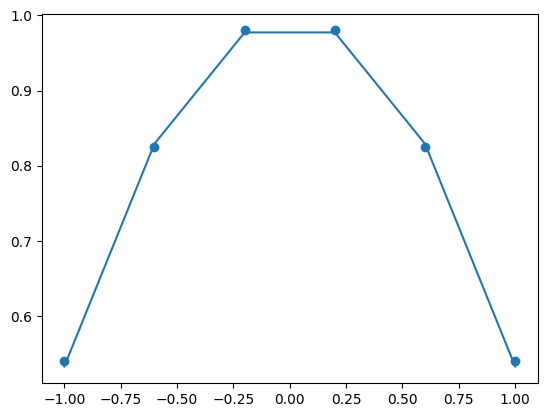

In [40]:
def f(x): #define some function, e.g. f(x)=log(x)
  return np.cos(x)


#We want to approximate this mesh of points with a straigth line
x = np.linspace(-1,1,6)
fig, ax = plt.subplots()
ax.scatter(x,f(x))
#***************************************************************

#***************************************************************

#***u1 and u2 will be my generators***
def u1(x):
  return 1

def u2(x):
  return x

def u3(x):
  return x**2
#*************************************

a = -1
b = 1

#This means aλ = b
A = np.array([
    [innerProductForContinious(u1,u1,a,b),innerProductForContinious(u1,u2,a,b),innerProductForContinious(u1,u3,a,b)],
    [innerProductForContinious(u2,u1,a,b),innerProductForContinious(u2,u2,a,b),innerProductForContinious(u2,u3,a,b)],
    [innerProductForContinious(u3,u1,a,b),innerProductForContinious(u3,u2,a,b),innerProductForContinious(u3,u3,a,b)]])
B = np.array([innerProductForContinious(u1,f,a,b),innerProductForContinious(u2,f,a,b),innerProductForContinious(u3,f,a,b)])

sol = np.linalg.solve(A,B)

def approx(x):
  return sol[0]*u1(x)+sol[1]*u2(x)+sol[2]*u3(x)

y = approx(x)
ax.plot(x,y)
#***************************************************************


#Unit 11: Numerical differentiation and integration

##Numerical differentiation

##Numerical integrals

We have a function f(x) continuous in a,b ∈ R and we want to integrate in [a,b].
>One naïve approach would be using the lower and upper endpoint sums: <br>
∫f <= ∑f <= f(n0) ∫f  <br>
(**if the function is increasing, otherwise it's the other way around**). This way, the complexity in space is constant, it always uses the same memory.

>A better way is to subdivide the integral using trapezoids. The area of a trapezoid would be:<br>
heigth*((base1+base2)/2)<br>
In an integral base1 would be f(xi) and base2 would be f(xi+1), being the height (xi+1) -(xi) (<strong>The trapezoid is rotated 90 degrees</strong>).

>An even better approximation would be using interpolation. We can approach our function with an interpolated polynomial. This means that in a subinterval of the domain, we can approximate the function by using (n+1) nodes, n being the degree of the polynomial.<br>
Now that we have a polynomial, we can say that p(xi)=f(x), which leads to the **Simpson's formula**:<br>
∫f ≈ ∑((xi+1-xi)/6)*(f(x1)+4(f(xi+h/2))+f(xi+1)) ≈ ∑((xi+1-xi)/2)*(f(x1+1)+f(xi))


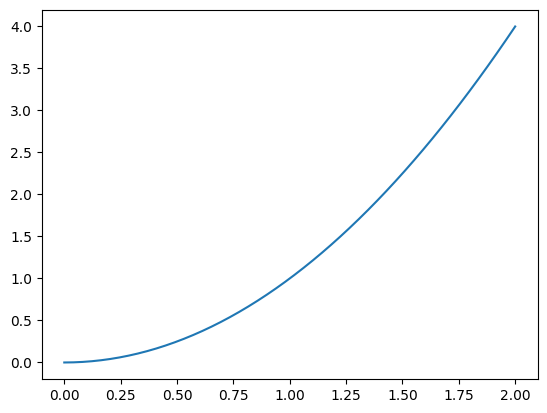

In [39]:
def f(x):
  return x**2

fig,ax = plt.subplots()
t = np.linspace(0,2,50)
y = f(t)
ax.plot(t,y)

plt.show()

###Lower-endpoint and upper-endpoint sums (naïve way):

In [ ]:
#Naïve way: it's inneficcient because of the iterative factor, but there's a
#better algorithm

def lowerIntegration(f,a,b,n):
  '''
  Parameters
  ----------
    f : function
    a : float
        left-most extreme
    b : float
        right-most extreme
    n : float
        number of subintervals

  Returns
  -------
    sum: float
        lower-endpoint sum
  '''
  sum = 0
  h=(b-a)/n
  x = a
  for i in range(n):
    sum += h*f(x)
    x += h
  return sum


def upperIntegration(f,a,b,n):
  '''
  Parameters
  ----------
    f : function
    a : float
        left-most extreme
    b : float
        right-most extreme
    n : float
        number of subintervals

  Returns
  -------
    sum: float
        upper-endpoint sum
  '''
  sum = 0
  h=(b-a)/n
  x = a
  for i in range(n):
    sum += h*f(x+h)
    x += h
  return sum

In [ ]:
print(lowerIntegration(f,0,1,1000))
print(upperIntegration(f,0,1,1000))

In [ ]:
#This one is a bit better
def midpointIntegration(f,a,b,n):
  '''
  Parameters
  ----------
    f : function
    a : float
        left-most extreme
    b : float
        right-most extreme
    n : float
        number of subintervals

  Returns
  -------
    sum: float
        midpoint sum
  '''
  sum = 0
  h=(b-a)/n
  x = a
  for i in range(n):
    sum += h*f(x+h/2)
    x += h
  return sum

In [ ]:
print(midpointIntegration(f,0,1,1000))

###Trapezoidal integration

In [38]:
#This one is a better approximation, but it might not be worth it as it requires
#more computations. It will be useful when using more complex functions than x^2
def trapezoidIntegration(f,a,b,n):
  '''
  Parameters
  ----------
    f : function
    a : float
        left-most extreme
    b : float
        right-most extreme
    n : float
        number of subintervals

  Returns
  -------
    sum: float
        trapezoidal integration approximation
  '''
  sum = 0
  h=(b-a)/n
  x = a
  for i in range(n):
    sum += h*(f(x+h)+f(x))/2
    x += h
  return sum

In [ ]:
print(trapezoidIntegration(f,0,1,1000))

###Simpson's integration

In [35]:
#This ones gives a veeery precise approximation to the integral
def simpsonIntegration(f,a,b,n):
  '''
  Important! Less intervals are required than other methods as this gives a
  very very precise approximation to the integral

  Parameters
  ----------
    f : function
    a : float
        left-most extreme
    b : float
        right-most extreme
    n : float
        number of subintervals

  Returns
  -------
    sum: float
        approximation by the Simpon's formula of integration
  '''
  sum = 0
  h=(b-a)/n
  x = a
  for i in range(n):
    sum += h*(f(x+h)+4*f(x+h/2)+f(x))/6
    x += h
  return sum

In [37]:
print(simpsonIntegration(f,0,1,1000))
print(simpsonIntegration(f,0,1,10)) #Less subintervals gives better results

0.4596976941318607
0.45969771009833754


###Romber integration:

The Romber's method is different to the other methods. It still **approximates** an integral. The formula goes like so: ⬇

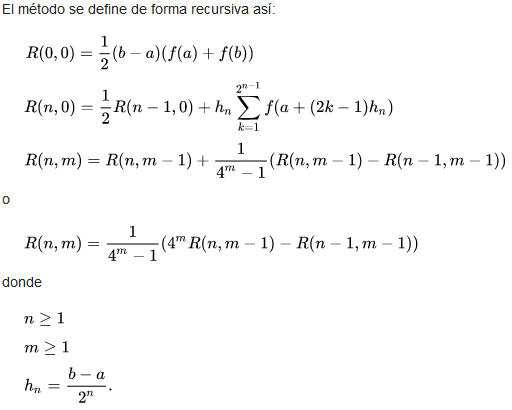

This way we can create a cascading table:<br>
R(0,0) <br> R(1,0) R(1,1) <br> R(2,0) R(2,1) R(2,2) <br>

The best approximation will be given by the last item in the last row



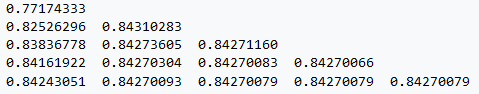

In [32]:
def  rombergIntegration(f,a,b,k):
  '''
  Parameters
  ----------
    f : function
    a : float
    b : float
    k : int
        number of iterations we want

  Returns
  -------
    approximation: float
        approximation of the integral by the Romberg's method
  '''
  R = []
  h = b - a
  R.append([h*(f(a)+f(b))/2])
  n = 1
  while True:
    row = []
    sum = 0
    h = h/2
    for k in range(1,2**(n-1)+1):
      sum = sum + f(a+(2*k-1)*h)
    row.append(R[n-1][0]/2+h*sum)
    for m in range(1,n+1):
      row.append((4**m*row[m-1]-R[n-1][m-1])/(4**m-1))
    R.append(row)
    if np.abs(row[n] - row [n-1]) < tolerance:
      print(R)
      return row[n]
    n = n + 1

In this second version, we prescribe the number of subintervals $n=2^k$.

In [36]:
def rombergIntegration2(f, a, b, k):
  R = []
  h = b - a
  R.append([h*(f(a)+f(b))/2])
  for n in range(1,k):
    row = []
    sum = 0
    h = h/2
    for k in range(1,2**(n-1)+1):
      sum = sum + f(a+(2*k-1)*h)
    row.append(R[n-1][0]/2+h*sum)
    for m in range(1,n+1):
      row.append((4**m*row[m-1]-R[n-1][m-1])/(4**m-1))
    R.append(row)
  print(R)
  return row[n]

def f(x):
  return np.sin(x)

print(rombergIntegration2(f,0,1,2))

[[0.42073549240394825], [0.45008051550407563, 0.4598621898707848]]
0.4598621898707848
0.45969831879846146


#Unit 12: Numerical resolution of ODEs

Ordinary Differential Equations (ODEs) can be describe as functions of the form:<br>
* y=f(x)
* y'=F(x,y)

>For example:<br>
y' = x -> y(x) = (x^2)/2 + C
<br><br>
y' = y -> (y'/y) = 1 -> log(y) = x + c -> y = a * e^x

In order to solve these equations, there's some different ways:
* If given the derivative as y' = F(x,y) and a point of y(x0):
  1. I know the derivative, so I know the tangent line. And have two points: x0 and x0+h = x1
  2. y = y0+y'(x0)(x-x0) -> y1 = y0+F(x0,y0)*h -> y2 = y1+F(x1,y1)*h
  3. We can approximate the original function y with the Euler's method.

Solving ODEs can be practical for, for example, programming physics.

##Euler's method:

In [ ]:
def F(x,y):
  return y

def eulerODE(F,x0,y0,h,n): #n being the number of iterations

  #This list at the first stage only contain the first point
  xcoordinates = [x0]
  ycoordinates = [y0]
  x=x0
  y = y0

  for i in range(n):
    y+=h*F(x,y)
    x+=h
    ycoordinates.append(y)
    xcoordinates.append(x)

  return [xcoordinates,ycoordinates]

sol=eulerODE(F,0,1,0.01,100)

fig,ax = plt.subplots()

ax.plot(sol[0],sol[1])

x = np.linspace(0,1,10)
y = np.e**x

ax.plot(x,y)

plt.show()

##Midpoint formula (rectangular integration)
$y$

In [ ]:
def rectangularODE(f,a,b,y0,n):
  '''
  Parameters
  ----------
    f: function
    a: float
        lower extreme
    b: float
        upper extreme
    y0: float
        initial image
    n: integer
        number of iterations

  Returns
  -------
    [x,y]: array
      approximate points
  '''
  h = (b-a)/n
  Lx = [a]
  Ly = [y0]
  x = a
  y = y0
  for k in range(1,n+1):
    y += h*f(x+h/2,y+h*f(x,y)/2)
    x +=h

    Lx.append(x)
    Ly.append(y)
  return [Lx,Ly]

##Trapezoidal integration of ODEs

$y(i+1) ≈ yi + h(f(xi,yi)+f(x(i+1),y(i+1))/(2) ≈ y_i + h/2 (f(x_i,y_i)+f(x(i+1),y_i+(h*f(x_i,y_i)))$

In [ ]:
def trapezoidODE(f,a,b,y0,n):
  '''
  Parameters
  ----------
    f: function
    a: float
        lower extreme
    b: float
        upper extreme
    y0: float
        initial image
    n: integer
        number of iterations

  Returns
  -------
    [x,y]: array
      approximate points
  '''
  h = (b-a)/n
  Lx = [a]
  Ly = [y0]
  x = a
  y = y0
  for k in range(1,n+1):
    y += h*f(x+h/2,y+h*f(x,y)/2)
    x +=h

    Lx.append(x)
    Ly.append(y)
  return [Lx,Ly]

##Simpson's integration of ODEs



In [ ]:
def simpsonOD(f,a,b,y0,n):
  '''
  Parameters
  ----------
    f: function
    a: float
        lower extreme
    b: float
        upper extreme
    y0: float
        initial image
    n: integer
        number of iterations

  Returns
  -------
    [x,y]: array
      approximate points
  '''
  h = (b-a)/n
  Lx = [a]
  Ly = [y0]
  x = a
  y = y0
  for k in range(1,n+1):
    y += h/6*(f(x,y))
    x +=h

    Lx.append(x)
    Ly.append(y)
  return [Lx,Ly]